## Classification and Regression with Random Forest

### Description

`randomForest` implements Breiman's random forest algorithm (based on Breiman and Cutler's original Fortran code) for classification and regression. It can also be used in unsupervised mode for assessing proximities among data points.

randomForest实现Breiman的随机森林算法(基于Breiman和Cutler的原始Fortran代码)用于分类和回归。它也可以在无监督模式下用于评估数据点之间的相似性。

理论参见：
- Greenwell, B.M. Tree-Based Methods for Statistical Learning in R. 2022.
- https://easyai.tech/ai-definition/random-forest/
- https://zhuanlan.zhihu.com/p/86263786
- https://zhuanlan.zhihu.com/p/28217071

### Usage

```
## S3 method for class 'formula'
randomForest(formula, data=NULL, ..., subset, na.action=na.fail)
## Default S3 method:
randomForest(x, y=NULL,  xtest=NULL, ytest=NULL, ntree=500,
             mtry=if (!is.null(y) && !is.factor(y))
             max(floor(ncol(x)/3), 1) else floor(sqrt(ncol(x))),
             weights=NULL,
             replace=TRUE, classwt=NULL, cutoff, strata,
             sampsize = if (replace) nrow(x) else ceiling(.632*nrow(x)),
             nodesize = if (!is.null(y) && !is.factor(y)) 5 else 1,
             maxnodes = NULL,
             importance=FALSE, localImp=FALSE, nPerm=1,
             proximity, OOB.prox=proximity,
             norm.votes=TRUE, do.trace=FALSE,
             keep.forest=!is.null(y) && is.null(xtest), corr.bias=FALSE,
             keep.inbag=FALSE, ...)
## S3 method for class 'randomForest'
print(x, ...)
```

### Arguments
|               |                                                              |
| ------------- | ------------------------------------------------------------ |
| `data`        | an optional data frame containing the variables in the model. By default the variables are taken from the environment which `randomForest` is called from. |
| `subset`      | an index vector indicating which rows should be used. (NOTE: If given, this argument must be named.) |
| `na.action`   | A function to specify the action to be taken if NAs are found. (NOTE: If given, this argument must be named.) |
| `x, formula`  | a data frame or a matrix of predictors, or a formula describing the model to be fitted (for the `print` method, an `randomForest` object). |
| `y`           | 响应向量。如果是因子，则做分类，否则做回归。如果省略，' randomForest '则做无监督学习。A response vector. If a factor, classification is assumed, otherwise regression is assumed. If omitted, `randomForest` will run in unsupervised mode. |
| `xtest`       | a data frame or matrix (like `x`) containing predictors for the test set. |
| `ytest`       | response for the test set.                                   |
| `ntree`       |树的数量。这个值不应该设置得太小，以确保每个输入行至少被预测几次。 Number of trees to grow. This should not be set to too small a number, to ensure that every input row gets predicted at least a few times. |
| `mtry`        |在每一次分裂中候选变量的个数--从所有的特征中随机抽样而得。注意，默认值：对于分类(sqrt(p)， p是x中的变量数量)和回归(p/3)。 Number of variables randomly sampled as candidates at each split. Note that the default values are different for classification (sqrt(p) where p is number of variables in `x`) and regression (p/3) |
| `weights`     | 长度与' y '相同的正值向量，系抽样权重，仅用于对数据点进行采样，生成各棵树(不用于任何其他计算)。A vector of length same as `y` that are positive weights used only in sampling data to grow each tree (not used in any other calculation) |
| `replace`     | 抽样时样本是否放回?Should sampling of cases be done with or without replacement? |
| `classwt`     |各个目标类别所占份额的调整权重(现有数据可能不能体现原貌)。不需要加起来等于1。若忽略则与现有数据的份额相同。--**可以起到代价敏感的作用。** Priors of the classes. Need not add up to one. Ignored for regression. |
| `cutoff`      | 不知道这个做何用(Classification only) A vector of length equal to number of classes. The ‘winning’ class for an observation is the one with the maximum ratio of proportion of votes to cutoff. Default is 1/k where k is the number of classes (i.e., majority vote wins). |
| `strata`      |分层抽样怎么需要这个因子变量？没搞懂 A (factor) variable that is used for stratified sampling.    |
| `sampsize`    | Size(s) of sample to draw. For classification, if sampsize is a vector of the length the number of strata, then sampling is stratified by strata, and the elements of sampsize indicate the numbers to be drawn from the strata. |
| `nodesize`    | 终端节点的包含样例的最小值。将这个数字设置得更大会导致生长出更小的树(因此需要更少的时间)。注意，分类(1)和回归(5)的默认值是不同的。Minimum size of terminal nodes. Setting this number larger causes smaller trees to be grown (and thus take less time). Note that the default values are different for classification (1) and regression (5). |
| `maxnodes`    | 森林中树的最大终端节点数。Maximum number of terminal nodes trees in the forest can have. If not given, trees are grown to the maximum possible (subject to limits by `nodesize`). If set larger than maximum possible, a warning is issued. |
| `importance`  | Should importance of predictors be assessed?                 |
| `localImp`    | Should casewise importance measure be computed? (Setting this to `TRUE` will override `importance`.) |
| `nPerm`       | 每棵树乱排OOB数据的次数，用于评估变量的重要性。大于1的次数给出的估计稍微稳定一些，但不是很有效。目前仅用于回归。Number of times the OOB data are permuted per tree for assessing variable importance. Number larger than 1 gives slightly more stable estimate, but not very effective. Currently only implemented for regression. |
| `proximity`   | Should proximity measure among the rows be calculated?       |
| `OOB.prox`    | Should proximity be calculated only on “out-of-bag” data? defaults to proximity   |
| `norm.votes`  | If `TRUE` (default), the final result of votes are expressed as fractions. If `FALSE`, raw vote counts are returned (useful for combining results from different runs). Ignored for regression. |
| `do.trace`    | If set to `TRUE`, give a more verbose output as `randomForest` is run. If set to some integer, then running output is printed for every `do.trace` trees. |
| `keep.forest` | If set to `FALSE`, the forest will not be retained in the output object. If `xtest` is given, defaults to `FALSE`. |
| `corr.bias`   | perform bias correction for regression? Note: Experimental. Use at your own risk. 没搞清楚原理|
| `keep.inbag`  | Should an `n` by `ntree` matrix be returned that keeps track of which samples are “in-bag” in which trees (but not how many times, if sampling with replacement) |
| `...`         | optional parameters to be passed to the low level function `randomForest.default`. |

### Value

An object of class `randomForest`, which is a list with the following components:

|                |                                                              |
| -------------- | ------------------------------------------------------------ |
| `call`         | the original call to `randomForest`                          |
| `type`         | one of `regression`, `classification`, or `unsupervised`.    |
| `predicted`    | the predicted values of the input data based on out-of-bag samples. |
| `importance`   | 包含nclass + 2(用于分类)或两列(用于回归)的矩阵。对于分类，前nclass列是针对不同类的度量，计算精度的平均下降。第nclass +1列是所有类的精度下降的平均值。最后一列是基尼系数的平均下降。对于回归，第一列是精度的平均下降，第二列是MSE的平均下降。如果importance=FALSE，最后一个度量值仍然以vector的形式返回。a matrix with `nclass` + 2 (for classification) or two (for regression) columns. For classification, the first `nclass` columns are the class-specific measures computed as mean descrease in accuracy. The `nclass` + 1st column is the mean descrease in accuracy over all classes. The last column is the mean decrease in Gini index. For Regression, the first column is the mean decrease in accuracy and the second the mean decrease in MSE. If `importance=FALSE`, the last measure is still returned as a vector. |
| `importanceSD` | “ermutation-based importance measure”也是随机变量，该值用于衡量该变量的变异范围--标准差。The “standard errors” of the permutation-based importance measure. For classification, a `p` by `nclass + 1` matrix corresponding to the first `nclass + 1` columns of the importance matrix. For regression, a length `p` vector. |
| `localImp`     | 用于衡量该变量针对于每一个样例预测的重要性。a p by n matrix containing the casewise importance measures, the [i,j] element of which is the importance of i-th variable on the j-th case. `NULL` if `localImp=FALSE`. |
| `ntree`        | number of trees grown.                                       |
| `mtry`         | number of predictors sampled for spliting at each node.      |
| `forest`       | (a list that contains the entire forest; `NULL` if `randomForest` is run in unsupervised mode or if `keep.forest=FALSE`. |
| `err.rate`     | (classification only) vector error rates of the prediction on the input data, the i-th element being the (OOB) error rate for all trees up to the i-th. |
| `confusion`    | (classification only) the confusion matrix of the prediction (based on OOB data). |
| `votes`        | (classification only) a matrix with one row for each input data point and one column for each class, giving the fraction or number of (OOB) ‘votes’ from the random forest. |
| `OOB.times`    | number of times cases are ‘out-of-bag’ (and thus used in computing OOB error estimate) |
| `proximity`    | if `proximity=TRUE` when `randomForest` is called, a matrix of proximity measures among the input (based on the frequency that pairs of data points are in the same terminal nodes). |
| `mse`          | (regression only) vector of mean square errors: sum of squared residuals divided by `n`. |
| `rsq`          | (regression only) “pseudo R-squared”: 1 - `mse` / Var(y).    |
| `test`         | if test set is given (through the `xtest` or additionally `ytest` arguments), this component is a list which contains the corresponding `predicted`, `err.rate`, `confusion`, `votes` (for classification) or `predicted`, `mse` and `rsq` (for regression) for the test set. If `proximity=TRUE`, there is also a component, `proximity`, which contains the proximity among the test set as well as proximity between test and training data. |

### Note

- The `forest` structure is slightly different between classification and regression. For details on how the trees are stored, see the help page for `getTree`.

- If `xtest` is given, prediction of the test set is done “in place” as the trees are grown. If `ytest` is also given, and `do.trace` is set to some positive integer, then for every `do.trace` trees, the test set error is printed. Results for the test set is returned in the `test` component of the resulting `randomForest` object. For classification, the `votes` component (for training or test set data) contain the votes the cases received for the classes. If `norm.votes=TRUE`, the fraction is given, which can be taken as predicted probabilities for the classes.

- For large data sets, especially those with large number of variables, calling `randomForest` via the formula interface is not advised: There may be too much overhead in handling the formula.对于大型数据集，特别是具有大量变量的数据集，不建议通过公式接口调用randomForest:处理公式时可能会有太多开销。

- The “local” (or casewise) variable importance is computed as follows: For classification, it is the increase in percent of times a case is OOB and misclassified when the variable is permuted. For regression, it is the average increase in squared OOB residuals when the variable is permuted.
- Can not handle categorical predictors with more than 53 categories.

### Author(s)

Andy Liaw [andy_liaw@merck.com](mailto:andy_liaw@merck.com) and Matthew Wiener [matthew_wiener@merck.com](mailto:matthew_wiener@merck.com), based on original Fortran code by Leo Breiman and Adele Cutler.

### References

Breiman, L. (2001), *Random Forests*, Machine Learning 45(1), 5-32.

Breiman, L (2002), “Manual On Setting Up, Using, And Understanding Random Forests V3.1”, https://www.stat.berkeley.edu/~breiman/Using_random_forests_V3.1.pdf.

### See Also

```
predict.randomForest`, `varImpPlot
```

## 算法解析

### 分类：原理解析
基于双环数据集，观察较多的树可使随机森林的分类界限平滑 

In [33]:
library(pacman)

options(warn = -1) # 忽略一切警告
options("width" = 140) # 充分利用打印宽度
options(repr.plot.width = 15, repr.plot.height = 10) # 满幅

p_load(rpart)
p_load(randomForest)

p_load(skimr)
s <- skim_tee

d <- read.csv("circles.csv")   #由data.py生成
d$y <- factor(d$y)
s <- skim_tee
s(d)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             20000 
Number of columns          3     
_______________________          
Column type frequency:           
  factor                   1     
  numeric                  2     
________________________         
Group variables            None  

── Variable type: factor ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique top_counts        
1 y                     0             1 FALSE          2 0: 10000, 1: 10000

── Variable type: numeric ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate       mean    sd    p0    p25       p50   p75 p100 hist 
1 x1                    0             1 -0.000534  0.612 -1.16 -0.567 -0.00237  0.570 

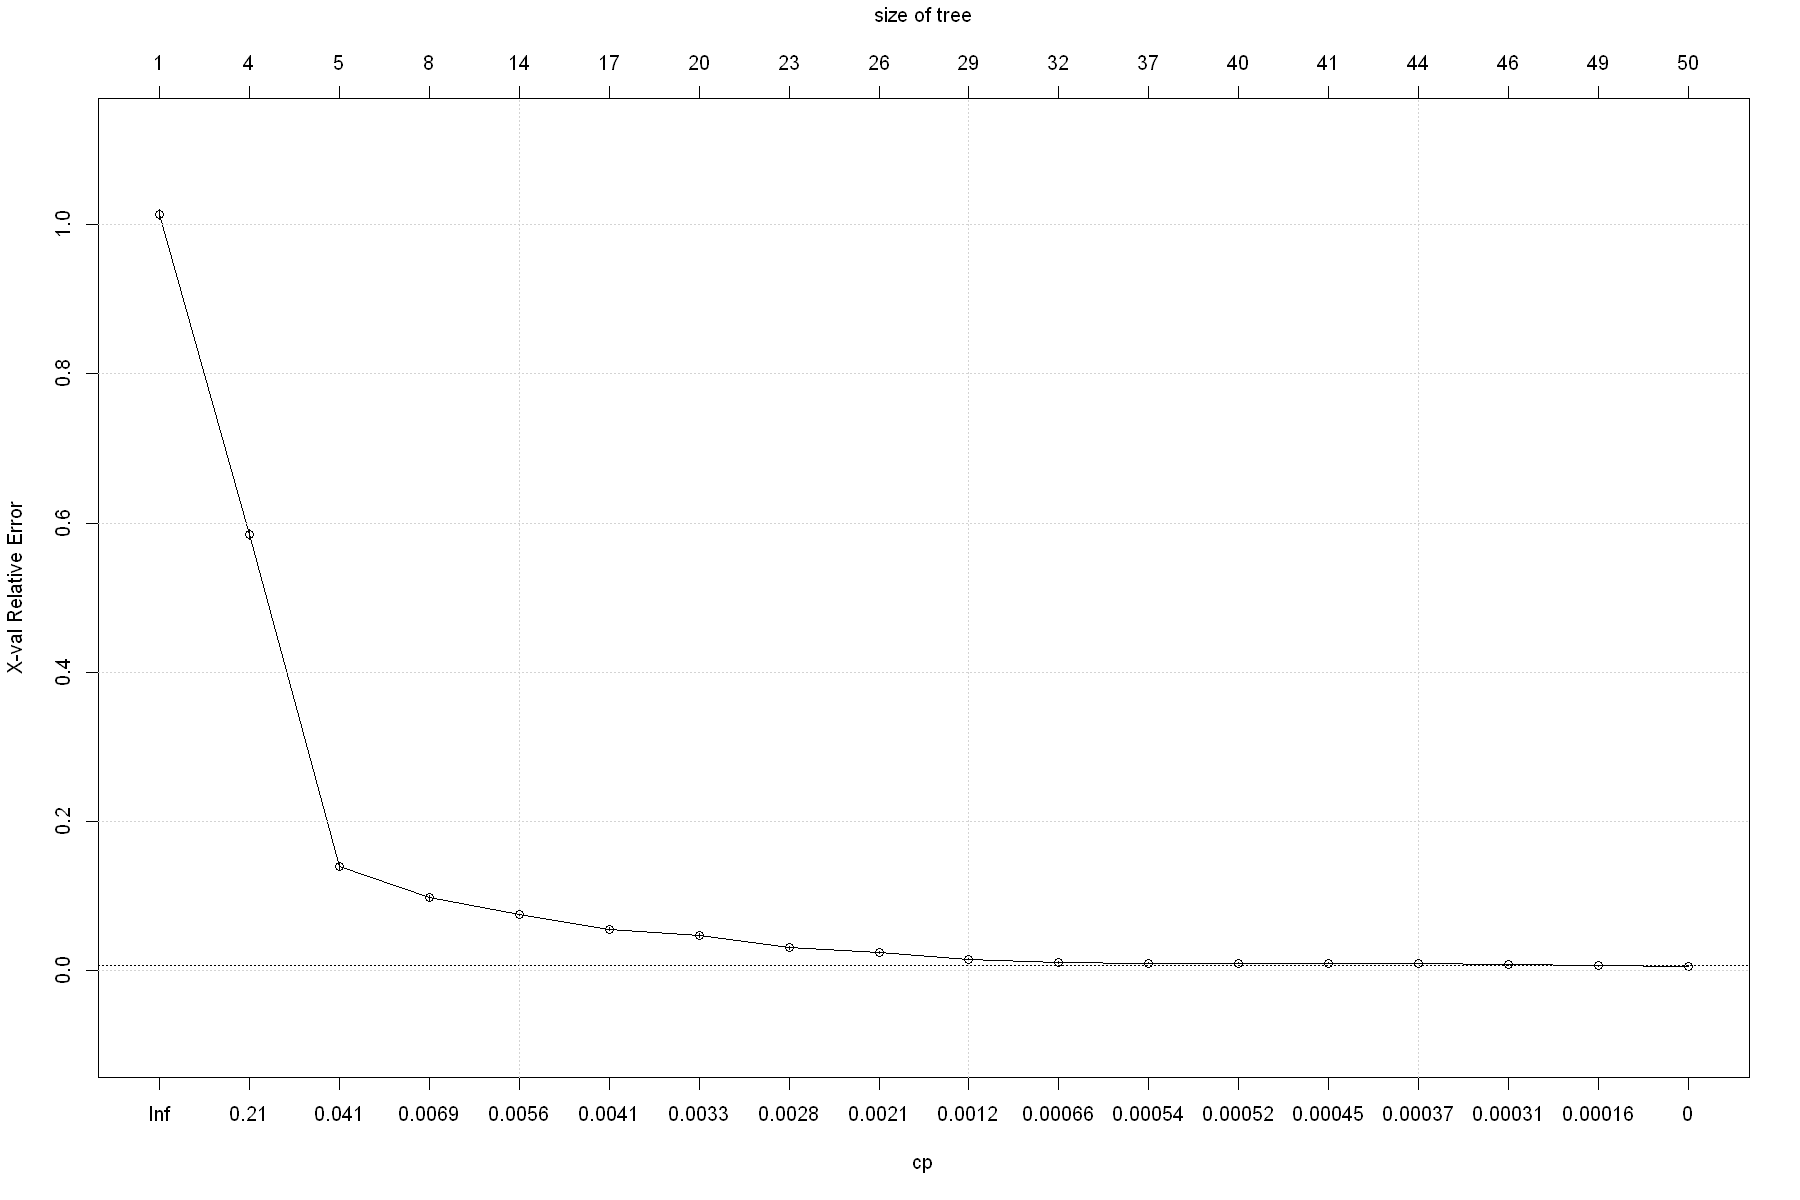

In [34]:
set.seed(2) # 固定xstd：xerror具有随机性--数据随机分割的原因
plotcp(rpart(y ~ ., data = d, method = "class", cp = 0))
grid()

Call:
rpart(formula = y ~ ., data = d, method = "class", cp = 0.00054)
  n= 20000 

            CP nsplit rel error xerror        xstd
1  0.215266667      0    1.0000 1.0156 0.007070207
2  0.213700000      3    0.3542 0.8108 0.006943354
3  0.007750000      4    0.1405 0.1447 0.003663754
4  0.006200000      7    0.1119 0.0955 0.003015624
5  0.005100000     13    0.0646 0.0807 0.002782872
6  0.003366667     16    0.0469 0.0558 0.002329017
7  0.003266667     19    0.0368 0.0484 0.002173217
8  0.002350000     22    0.0270 0.0373 0.001913226
9  0.001933333     25    0.0188 0.0269 0.001629055
10 0.000800000     28    0.0130 0.0158 0.001252006
11 0.000550000     31    0.0106 0.0117 0.001078497
12 0.000540000     36    0.0075 0.0112 0.001055333

Variable importance
x1 x2 
57 43 

Node number 1: 20000 observations,    complexity param=0.2152667
  predicted class=0  expected loss=0.5  P(node) =1
    class counts: 10000 10000
   probabilities: 0.500 0.500 
  left son=2 (2208 obs) right son=3 (177

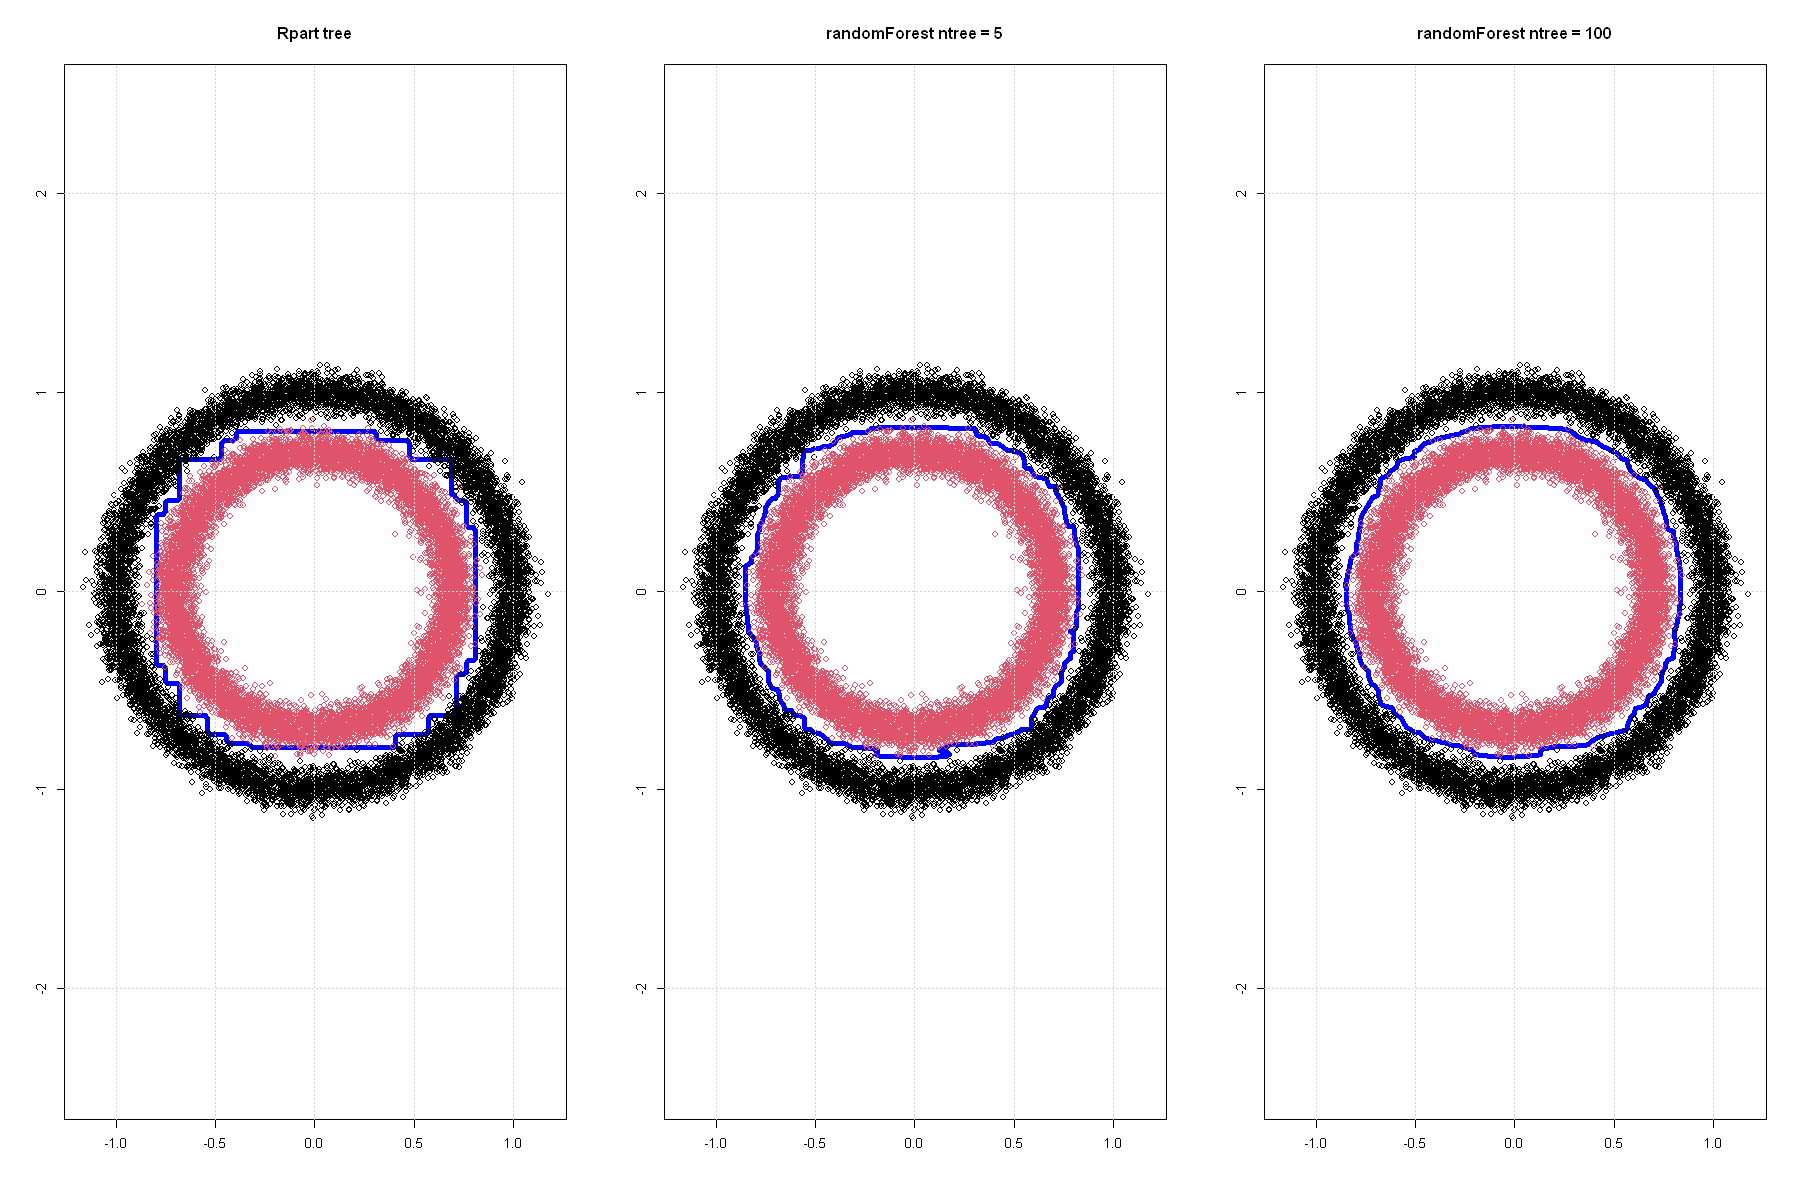

In [35]:
n <- c(5, 100)  #树的个数
par(mfrow = c(1, 3))

cto <- rpart(y ~ ., data = d, method = "class", cp = 0.00054)  
summary(cto)
cat("\n------------------------------------------------------------------------------------------------------\n")
x1 <- seq(min(d$x1), max(d$x1), length = 100)
x2 <- seq(min(d$x2), max(d$x2), length = 100)

pd <- function(x1, x2) 
{
  predict(cto, data.frame(x1, x2), type = "prob")[, 1]
}

z <- outer(x1, x2, FUN = pd)
contour(x1, x2, z, levels = 0.5, drawlabels = FALSE, lwd = 4, asp = 1, col = "blue") # 画出分类界限--置信度为0.5的等高线
points(d$x1, d$x2, col = d$y)
title(paste("Rpart tree"))
grid()

for (ntree in n) {
  set.seed(111)
  rf <- randomForest(y ~ ., d, ntree = ntree)
  print(rf)
  cat("\n------------------------------------------------------------------------------------------------------\n")

  pd <- function(x1, x2) 
  {
    predict(rf, data.frame(x1, x2),type = "prob")[ , 1]
  }
  z <- outer(x1, x2, FUN = pd)
  contour(x1, x2, z, levels = 0.5, drawlabels = FALSE, lwd = 4, asp = 1, col = "blue")   #画出分类界限--置信度为0.5的等高线
  points(d$x1, d$x2, col = d$y)
  title(paste("randomForest ntree =", ntree))
  grid()
}

可见：随着树的增多("Rpart tree"只有一棵树)，分类的界限越来越平滑，接近一个圆(理论分界线)，泛化性能越来越好。

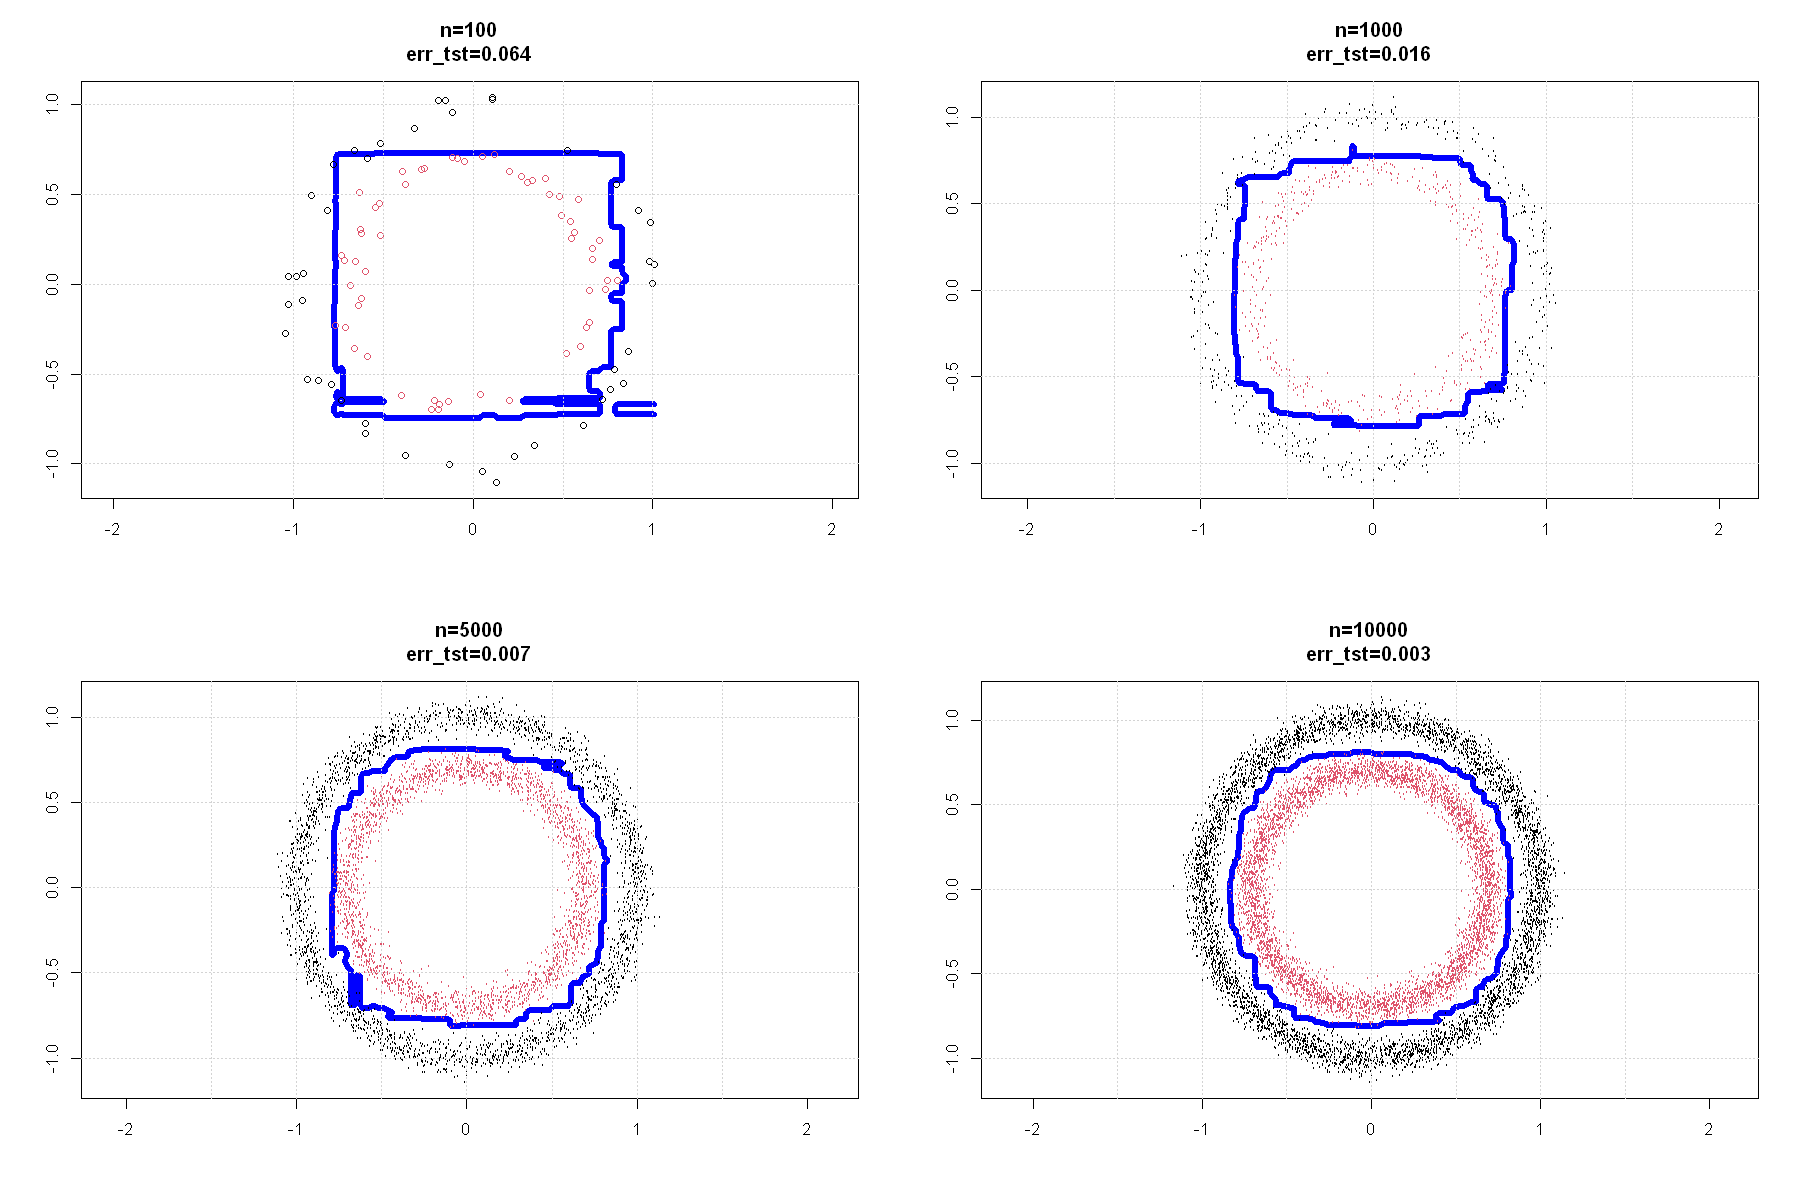

In [36]:
options(repr.plot.width = 15, repr.plot.height = 10) # 满幅
library(randomForest)
library(data.table)
D <- fread("circles.csv")
D$y <- factor(D$y)

set.seed(22)
I <- sample(2 * 1e4, 1e4)
trn <- D[I, ]
tst <- D[-I, ]

par(mfrow = c(2, 2))
for (n in c(1e2, 1e3, 5 * 1e3, 1e4)) {
  set.seed(11)
  I <- sample(1e4, n)
  d <- trn[I, ]

  rf <- randomForest(y ~ ., d, ntree = 5)
  err_tst <- mean(predict(rf, tst) != tst$y)

  x1 <- seq(min(d$x1), max(d$x1), length = 100)
  x2 <- seq(min(d$x2), max(d$x2), length = 100)
  pd <- function(x1, x2) {
    predict(rf, data.frame(x1, x2), type = "prob")[, 1]
  }

  z <- outer(x1, x2, FUN = pd)
  contour(x1, x2, z, levels = 0.5, drawlabels = FALSE, lwd = 5, col = "blue", asp = 1)
  points(d$x1, d$x2, col = d$y, cex = ifelse(n == 100, 100 / n, 10 / n))
  grid()
  title(stringr::str_glue("n={n}\nerr_tst={round(err_tst,3)}"))
}

可见，树的个数恒定，随机森林的泛化性能随着训练集的增大而提升--分类的界限越来越圆滑，接近于圆

### 分类：平衡、代价不敏感、无缺失值、特征混合取值
The Abalone data consist of data from 4177 abalones. The data consist of measurements of the type (male, female and infant), the longest shell measurement, the diameter, height and several weights (whole, shucked, viscera and shell). The outcome is the number of rings. The age of the abalone is the number of rings plus 1.5.

将原abalone数据集的“Rings”值改造成"L"、 "H"二个平衡类别，当前的问题是根据一系列特征判断abalone的“Rings”类别。

In [ ]:
library(pacman)

options(warn = -1) # 忽略一切警告
options("width" = 140) # 充分利用打印宽度
options(repr.plot.width = 15, repr.plot.height = 10) # 满幅

p_load(rpart)
p_load(randomForest)
p_load(AppliedPredictiveModeling)
p_load(skimr)
s <- skim_tee

In [ ]:
#将数据改造成平衡的二类(Rings)
data(abalone)
ab <- abalone
ab$Rings <- factor((ab$Rings) > 9, labels = c("L", "H")) # 处理成二类，逻辑型factor的levels的排序默认是：FALSE,TRUE，分别对应于"L","H"
s(ab)

In [ ]:
# 将数据集1:1随机分割成训练集和测试集
set.seed(100)
I <- sample(nrow(ab), nrow(ab) * 0.5)
train_ab <- ab[I, ]
test_ab <- ab[-I, ]
s(train_ab)

In [ ]:
set.seed(71)
(rf_ab <-randomForest(Rings ~ ., data = train_ab, importance = TRUE, proximity = TRUE, localImp = TRUE)) #默认norm.votes=TRUE

“OOB estimate of  error rate”是指训练集中的样例用其没有参与生成的决策树判断的error rate

In [ ]:
#由xerror 1-SE rule确定最优cp=0.011，详见https://github.com/A-Pai/rpart-solveing/blob/main/1-rpart.ipynb
ctabo <- rpart(Rings ~ ., data = train_ab, method = "class", cp = 0.011) 
#决策树的泛化性能
(error_test_t <- mean(predict(ctabo, test_ab, type = "class") != test_ab$Rings))    #测试集的错误率

#随机森林的泛化性能
(error_test_f <- mean(predict(rf_ab, test_ab) != test_ab$Rings))    #测试集的错误率
#随机森林的泛化性能优于决策树

In [ ]:
#测试集的混淆矩阵
table(observed = test_ab$Rings, predicted = predict(rf_ab, test_ab) )

In [ ]:
rf_ab$votes #randomForest函数默认norm.votes=TRUE，返回判别的置信度

In [ ]:
set.seed(71)
(rf_ab <- randomForest(Rings ~ ., data = train_ab, importance = TRUE, proximity = TRUE, localImp = TRUE, norm.votes = FALSE))
rf_ab$votes #当上句norm.votes=FALSE时返回返回判定为这个类别的次数

In [ ]:
hist(rowSums(rf_ab$votes))  #OOB的次数的分布：由于随机性，每个样例OOB的次数不同

In [ ]:
sum(rf_ab$votes)/(nrow(train_ab)*500)  #样例未被抽中(OOB)的概率
#接近1/e=0.3678794

In [ ]:
#随着树的增多而收敛,上下曲线对应着二个类别，中间曲线是二者的平均值。
plot(rf_ab)
grid()

In [ ]:
# 各个特征的重要性均值:
(vip <- rf_ab$importance)

- MeanDecreaseAccuracy--打乱该变量值在数据集中的排列顺序前后构建随机森林的Accuracy的差的均值：假设这个变量无用(对于目标变量毫无提示作用)，那么打乱这列变量值的排列顺序，不影响最终的Accuracy，如果打乱后所有样例的Accuracy均值下降大，则说明此变量重要。
- MeanDecreaseGini--使用该变量导致的Gini值下降幅度的均值：若该变量重要则其在所有决策树中的Gini下降值应该大。

In [ ]:
# 各个特征的重要性标准差:
rf_ab$importanceSD

In [ ]:
# 变量重要性降序排列
par(mfrow = c(3,1))
barplot(sort(vip[, "MeanDecreaseAccuracy"], decreasing = TRUE), main = "MeanDecreaseAccuracy")
barplot(sort(vip[, "MeanDecreaseGini"], decreasing = TRUE), main = "MeanDecreaseGini")
barplot(ctabo$variable.importance, main = "VIP-rpart")    #最优rpart决策树的变量重要性降序排列
#可见三者不尽相同--评价的标准不同

In [ ]:
# “局部重要性”--casewise importance measure，应该是“MeanDecreaseAccuracy”？关注这个值有什么用？
rf_ab$localImportance

In [ ]:
#每个树的袋外判错率
rf_ab$err.rate

In [ ]:
#每个树的袋外判错率的直方图
hist(rf_ab$err.rate[,1],100) 

In [ ]:
#每个样例处于OOB的次数
hist(rf_ab$oob.times) 

In [ ]:
#训练集的预测值
rf_ab$predicted

In [ ]:
rf_ab$proximity   #出现在同一叶节点的比率--可以用以衡量样例间的相似性

### 分类：非平衡、代价敏感、无缺失值

数据集friedman1:The friedman1 benchmark problem uses simulated regression data with 7 input features according to:$Y=10\sin(\pi X_1X_2)+20(X_3-0.5)^2+10X_4+5X_5+\epsilon$ , where $\epsilon\sim N(0,\sigma)$  and the input features are all independent uniform random
variables on the interval $[0,1]$: $\{X_j\}^{7}_ {j=1}\overset{iid}{\sim} U(0,1)$, Notice how $X_6 \sim X_{10} $ are unrelated to the response $Y$ .


将该数据集改造成"L"、"H"二类数量悬殊的非平衡数据集

In [ ]:
library(pacman)

options(warn = -1) # 忽略一切警告
options("width" = 140) # 充分利用打印宽度
options(repr.plot.width = 15, repr.plot.height = 10) # 满幅

p_load(rpart)
library(randomForest)
p_load(skimr)
s <- skim_tee

**生成数据**

In [ ]:
#训练集
set.seed(943) # for reproducibility
tr_fr <- treemisc::gen_friedman1(100000, nx = 10, sigma = 0.1)
tr_fr$y <- factor(ifelse(tr_fr$y < quantile(tr_fr$y,0.9), "L", "H"))
s(tr_fr)

In [ ]:
#测试集
set.seed(955) # for reproducibility
te_fr <- treemisc::gen_friedman1(100000, nx = 10, sigma = 0.1)
te_fr$y <- factor(ifelse(te_fr$y < quantile(te_fr$y,0.9),"L", "H"))
s(te_fr)

假定将L类判为H类的代价为1，H类判为L类的代价为9

**不采用非平衡方面的处置**

In [ ]:
set.seed(71)
(rf_fr <- randomForest(y ~ ., data = tr_fr, ntree = 501))
plot(rf_fr)
grid()

In [ ]:
#测试集总损失
sum((te_fr$y == "L") & (predict(rf_fr, te_fr) == "H")) * 1 + sum((te_fr$y == "H") & (predict(rf_fr, te_fr) == "L")) * 9

#### 内部参数法

--不改变外部训练数据，从训练算法入手

In [ ]:
w <- ((tr_fr$y == "L") * 1 + (tr_fr$y == "H") * 9)    #H类样例的抽样概率是L类的9倍

set.seed(71)
(rf_frW <- randomForest(y ~ ., data = tr_fr, weights = w, ntree = 501))
plot(rf_frW)
grid()

In [ ]:
#随机森林rf_frW的测试集总损失
sum((te_fr$y == "L") & (predict(rf_frW, te_fr) == "H")) * 1 + 
sum((te_fr$y == "H") & (predict(rf_frW, te_fr) == "L")) * 9

In [ ]:
#采用“内部参数法”的rpart最优决策树的性能
lm <- matrix(c(0,9,1,0), byrow = TRUE, nrow = 2) #L类判为H类的代价为1，H类判为L类的代价为9
ct_fr1o <- rpart(y ~ ., data = tr_fr, parms = list(loss = lm), cp = 0.026)  #参见https://github.com/A-Pai/rpart-solveing/blob/main/1-rpart.ipynb
#ct_fr1o最优决策树测试集总损失
sum((te_fr$y == "L") * (predict(ct_fr1o, te_fr, type = "class") == "H")) * 1 + 
sum((te_fr$y == "H") * (predict(ct_fr1o, te_fr, type = "class") == "L")) * 9

二者比较，随机森林的泛化性能更优，但耗时较长。

#### 数据扩充法

--按照代价(L类判为H类的代价为1，H类判为L类的代价为9)扩充数据，因此将H类扩充到原来的9倍。

In [ ]:
#将1类扩充到原来的5倍--1类判错的代价是0类的3倍
id <- tr_fr$y == "H"

tr_frE <- tr_fr
for(i in 1:8){
    tr_frE <- rbind(tr_frE,tr_fr[id,])
}
set.seed(111)
tr_frE <- tr_frE[sample(nrow(tr_frE)),]  #乱序

table(tr_frE$y)  #训练集扩充后的构成

In [ ]:
set.seed(71)
(rf_frE <-randomForest(y ~ ., data = tr_frE, ntree = 501)) 
plot(rf_frE)
grid()

In [ ]:
#随机森林rf_frE的测试集总损失
sum((te_fr$y == "L") & (predict(rf_frE, te_fr) == "H")) * 1 + 
sum((te_fr$y == "H") & (predict(rf_frE, te_fr) == "L")) * 9

In [ ]:
#决策树ct_fr2o的测试集总损失
ct_fr2o <- rpart(y ~ ., data = tr_frE,  cp = 0.026)
sum((te_fr$y == "L") * (predict(ct_fr2o, te_fr, type = "class") == "H")) * 1 + 
sum((te_fr$y == "H") * (predict(ct_fr2o, te_fr, type = "class") == "L")) * 9

二者比较，随机森林的泛化性能更优，但耗时较长。

**思考：内部参数法与数据扩充法性能差异较大，为何？**

### 回归：无缺失值、特征连续取值


The Friedman 1 benchmark problem uses simulated regression data with 7 input features according to:$Y=10\sin(\pi X_1X_2)+20(X_3-0.5)^2+10X_4+5X_5+\epsilon$ , where $\epsilon\sim N(0,\sigma)$  and the input features are all independent uniform random
variables on the interval $[0,1]$: $\{X_j\}^{7}_ {j=1}\overset{iid}{\sim} U(0,1)$, Notice how $X_6 \sim X_7 $ are unrelated to the response $Y$ .

请注意$X_6 $、$ X_7 $独立于因变量$Y$，方便检验算法判断自变量重要性。

In [ ]:
library(pacman)

options(warn = -1) # 忽略一切警告
options("width" = 140) # 充分利用打印宽度
options(repr.plot.width = 15, repr.plot.height = 10) # 满幅

p_load(rpart)
p_load(randomForest)
p_load(skimr)
s <- skim_tee

In [ ]:
set.seed(943) # for reproducibility
fr <- treemisc::gen_friedman1(1000, nx = 7, sigma = 0.1)
s(fr)

In [ ]:
#将数据集1:1随机分割成训练集和测试集
set.seed(100)
I <- sample(nrow(fr),nrow(fr)*0.5)
train_fr <- fr[I,]
test_fr <- fr[-I,]
s(train_fr)

In [ ]:
set.seed(71)
(rf_fr <- randomForest(y ~ ., data = train_fr, importance = TRUE)) 
plot(rf_fr)
grid()

In [ ]:
#随机森林的泛化性能
(MSE_test_f <- mean((predict(rf_fr, test_fr)  - test_fr$y)^2))    #测试集的MSE

#根据1-SE原则，最优cp=0.0032,参见https://github.com/A-Pai/rpart-solveing/blob/main/1-rpart.ipynb
rtfro <- rpart(y ~ .,data = train_fr, cp = 0.0032)
#rpart决策树的泛化性能
(MSE_test <- mean((predict(rtfro, test_fr)   - test_fr$y)^2))    #测试集的MSE  

#二者比较，可见随机森林的泛化性能优于决策树

In [ ]:
# 特征的重要性均值:
(vip <- rf_fr$importance)

%IncMSE计算：
1. grow regression forest. Compute OOB-mse, name this mse0.
1. for 1 to j var: permute values of column j, then predict and compute OOB-mse(j)
1. %IncMSE of j'th is (mse(j)-mse0)/mse0 * 100%

IncNodePurity计算：

IncNodePurity (Increase in Node Purity) expresses the change in the homogeneity of the of the groups created by the trees ,for regression, it is measured by residual sum of squares.

In [ ]:
# 变量重要性降序排列
par(mfrow = c(3,1))
barplot(sort(vip[, "%IncMSE"], decreasing = TRUE), main = "%IncMSE")
barplot(sort(vip[, "IncNodePurity"], decreasing = TRUE), main = "IncNodePurity")
barplot(rtfro$variable.importance, main = "VIP-rpart")    #最优rpart决策树的变量重要性降序排列
#可见三者不尽相同，但随机森林的二种评价方式都将x6、x7排在了重要性的末尾，raprt未能将x6、x7排在重要性的末尾

In [ ]:
# 针对于各个样例的“局部重要性”
rf_ab$localImportance

In [ ]:
#每个样例处于OOB的次数--是这么多次回归的均值
rf_fr$OOB.times

In [ ]:
rf_ab$proximity

In [ ]:
#“pseudo R-squared”: 1 - mse /Var(y)
rf_ab$rsq

### 回归：无缺失值、特征混合取值

　　The Abalone data consist of data from 4177 abalones. The data consist of measurements of the type (male, female and infant), the longest shell measurement, the diameter, height and several weights (whole, shucked, viscera and shell). The outcome is the number of rings.  The age of the abalone is the number of rings plus 1.5.
  
  根据一系列特征推测abalone的年龄值

In [ ]:
library(pacman)

options(warn = -1) # 忽略一切警告
options("width" = 140) # 充分利用打印宽度
options(repr.plot.width = 15, repr.plot.height = 10) # 满幅

p_load(rpart)
p_load(randomForest)
p_load(AppliedPredictiveModeling)
p_load(skimr)
s <- skim_tee

In [ ]:
data(abalone)
ab <- abalone
s(ab)

In [ ]:
#将数据集1:1随机分割成训练集和测试集
set.seed(100)
I <- sample(nrow(ab),nrow(ab)*0.5)
train_ab <- ab[I,]
test_ab <- ab[-I,]
s(train_ab)

In [ ]:
set.seed(71)
(rf_ab <-randomForest(Rings ~ ., data = train_ab, importance = TRUE, proximity = TRUE, localImp = TRUE)) #默认norm.votes=TRUE

plot(rf_ab)
grid()

In [ ]:
#根据1-SE原则，最优cp=0.0097，参见https://github.com/A-Pai/rpart-solveing/blob/main/1-rpart.ipynb
rtabo <- rpart(Rings ~ .,data = train_ab, cp = 0.0097) 
#决策树的泛化性能
(MSE_test <- mean((predict(rtabo, test_ab) - test_ab$Rings)^2))    #测试集的MSE

#随机森林的泛化性能
(MSE_test_f <- mean((predict(rf_ab, test_ab)  - test_ab$Rings)^2))    #测试集的MSE
#可见随机森林的泛化性能优于决策树